In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.constraints import MaxNorm

In [5]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255.0
x_test = x_test.reshape(10000, 784).astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Model 1: L2 Regularization
model1 = Sequential()
model1.add(Dense(1024, activation="sigmoid", kernel_regularizer=l2(0.001), input_shape=(784,)))
model1.add(Dense(1024, activation="sigmoid", kernel_regularizer=l2(0.001)))
model1.add(Dense(2048, activation="sigmoid", kernel_regularizer=l2(0.001)))
model1.add(Dense(10, activation="softmax"))

In [7]:
# Model 2: L2 + KL-Sparsity Regularization
model2 = Sequential()
model2.add(Dense(1024, activation="sigmoid", kernel_regularizer=l2(0.001), activity_regularizer=l1(0.001), input_shape=(784,)))
model2.add(Dense(1024, activation="sigmoid", kernel_regularizer=l2(0.001), activity_regularizer=l1(0.001)))
model2.add(Dense(2048, activation="sigmoid", kernel_regularizer=l2(0.001), activity_regularizer=l1(0.001)))
model2.add(Dense(10, activation="softmax"))

In [8]:
# Model 3: Max-norm Regularization
model3 = Sequential()
model3.add(Dense(1024, activation="sigmoid", kernel_constraint=MaxNorm(3.0), input_shape=(784,)))
model3.add(Dense(1024, activation="sigmoid", kernel_constraint=MaxNorm(3.0)))
model3.add(Dense(2048, activation="sigmoid", kernel_constraint=MaxNorm(3.0)))
model3.add(Dense(10, activation="softmax"))

In [9]:
# Model 4: Dropout + L2 Regularization
model4 = Sequential()
model4.add(Dense(1024, activation="sigmoid", kernel_regularizer=l2(0.001), input_shape=(784,)))
model4.add(Dropout(0.2))
model4.add(Dense(1024, activation="sigmoid", kernel_regularizer=l2(0.001)))
model4.add(Dropout(0.2))
model4.add(Dense(2048, activation="sigmoid", kernel_regularizer=l2(0.001)))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation="softmax"))

In [10]:

# Model 5: Dropout + Max-norm Regularization
model5 = Sequential()
model5.add(Dense(1024, activation="sigmoid", kernel_constraint=MaxNorm(3.0), input_shape=(784,)))
model5.add(Dropout(0.2))
model5.add(Dense(1024, activation="sigmoid", kernel_constraint=MaxNorm(3.0)))
model5.add(Dropout(0.2))
model5.add(Dense(2048, activation="sigmoid", kernel_constraint=MaxNorm(3.0)))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation="softmax"))

# Compile the models
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the models
epochs = 50
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128, verbose=0)
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128, verbose=0)
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128, verbose=0)
history4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128, verbose=0)
history5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128, verbose=0)



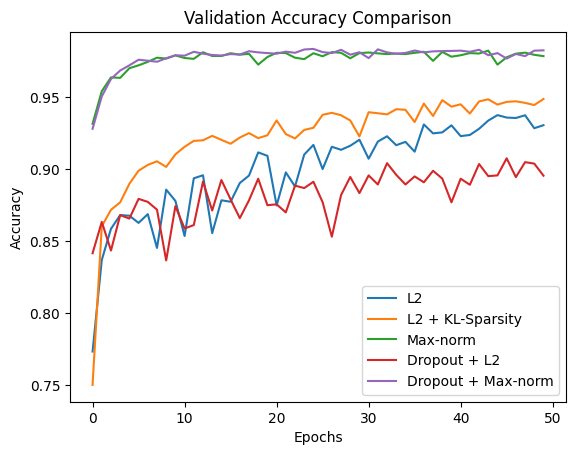

In [11]:
# Plot validation accuracy throughout training
plt.plot(history1.history["val_accuracy"], label="L2")
plt.plot(history2.history["val_accuracy"], label="L2 + KL-Sparsity")
plt.plot(history3.history["val_accuracy"], label="Max-norm")
plt.plot(history4.history["val_accuracy"], label="Dropout + L2")
plt.plot(history5.history["val_accuracy"], label="Dropout + Max-norm")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


313/313 [==============================] - 1s 1ms/step


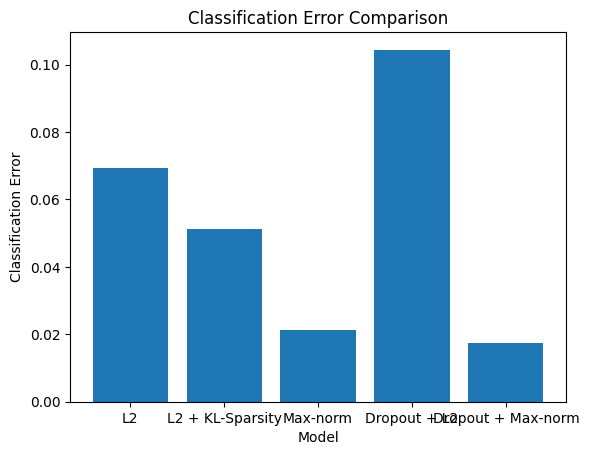

In [12]:
def calculate_classification_error(model, x, y):
    predictions = model.predict(x)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y, axis=1)
    error = np.mean(y_pred != y_true)
    return error

errors = []

# Calculate classification error for each model
errors.append(calculate_classification_error(model1, x_test, y_test))
errors.append(calculate_classification_error(model2, x_test, y_test))
errors.append(calculate_classification_error(model3, x_test, y_test))
errors.append(calculate_classification_error(model4, x_test, y_test))
errors.append(calculate_classification_error(model5, x_test, y_test))

# Plot classification errors
models = ["L2", "L2 + KL-Sparsity", "Max-norm", "Dropout + L2", "Dropout + Max-norm"]
plt.bar(models, errors)
plt.title("Classification Error Comparison")
plt.xlabel("Model")
plt.ylabel("Classification Error")
plt.show()
